In [1]:
import sys
parentdir = 'C:\\Users\\Jerzy\\Documents\\GitHub\\BAMT'
sys.path.insert(0, parentdir)


In [2]:
import time
from tqdm import tqdm
from graph.precision_recall import precision_recall
import math
import pandas as pd
import numpy as np
from bayesian.train_bn import structure_learning
from preprocess.discretization import get_nodes_type, code_categories
from visualization.visualization import draw_BN, draw_comparative_hist
from sklearn.metrics import mutual_info_score
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.style.use('seaborn')
plt.rcParams.update({'font.size': 22})


In [3]:
def get_n_nearest(data, columns, corr=False, number_close=5):
    groups = []
    if corr:
        for c in columns:
            close_ind = data[c].sort_values(ascending=False).index.tolist()
            groups.append(close_ind[0:number_close+1])
    else:
        for c in columns:
            close_ind = data[c].sort_values().index.tolist()
            groups.append(close_ind[0:number_close+1])

    return groups


In [4]:
df = pd.read_csv('C:\\Users\\Jerzy\\Documents\\GitHub\\BAMT\\data\\arth150.csv')
df

,4,8,13,20,26,38,47,61,63,78,81,86,93,96,100,101,108,111,126,135,144,155,161,181,187,197,198,209,211,219,226,234,245,248,256,269,272,281,289,296,...,558,560,565,570,573,576,585,596,598,600,603,622,623,627,629,636,640,651,661,665,666,677,679,686,699,712,714,726,736,738,739,758,767,778,779,781,783,786,793,798
0,6.521724,7.321234,6.092435,4.376673,8.889295,7.226766,5.814137,6.045322,3.713467,7.914725,5.357957,4.559088,7.248751,5.790925,8.317595,7.492487,6.145878,6.212384,9.051678,5.618380,8.281373,5.671311,6.032587,5.462550,5.692533,5.034996,6.260343,7.440763,5.703722,6.839912,4.969002,5.479676,6.970678,6.002394,5.986575,6.069584,7.363334,6.494554,7.332034,8.254655,...,6.229174,5.634474,9.239049,5.597387,5.513638,5.714180,5.389246,7.610518,4.885108,6.479719,5.930953,5.409301,10.217562,5.725726,8.988432,4.876760,6.230152,6.292175,6.196959,6.693887,4.613157,5.705521,5.347742,5.057389,4.814607,6.625472,7.255758,5.749810,8.806088,4.356365,8.252099,7.367155,4.923531,5.360546,4.944006,5.194633,4.122674,9.316441,8.799917,7.797762
1,6.922419,7.450482,4.970940,4.934506,8.438783,6.479736,5.391489,5.445438,4.655772,8.299301,4.652400,6.190521,7.122081,4.601211,7.657444,7.815745,6.213407,6.428473,9.000202,5.399627,8.203504,5.739864,5.154324,5.525449,5.980274,6.173173,6.340496,6.713748,5.674401,6.764965,4.974066,5.183356,5.952956,6.126316,5.685654,5.978959,7.919968,6.723425,10.052287,8.066231,...,6.800378,6.119752,8.358338,5.901124,4.160223,5.988240,5.446712,8.861030,6.456210,6.418158,5.829224,5.697104,10.499572,5.721704,8.438337,4.800949,6.168384,6.598897,5.669643,6.823204,6.980395,5.453589,5.481345,3.333270,4.618343,6.985113,7.446057,4.885844,8.225975,4.601245,8.053541,4.940663,5.773989,6.698691,5.232851,5.388365,4.103878,9.104793,7.516230,7.795669
2,6.623855,7.690659,5.301850,4.611453,8.736501,6.812775,4.964662,5.744569,5.430197,8.572852,5.403405,5.677009,7.231610,5.220161,7.865162,6.800105,5.781974,6.246832,8.712892,4.817472,7.450620,5.941685,6.360301,5.675772,5.054199,5.992390,6.274656,6.747749,5.365757,6.981870,3.911265,5.503124,6.580783,7.377751,5.847004,6.841391,8.382519,6.279180,8.607936,7.619245,...,6.857882,6.092937,8.395570,6.055739,4.773299,5.726805,5.198248,7.805059,6.920791,5.796125,5.682986,5.950349,9.539523,7.578493,8.067045,4.998532,6.032781,6.412435,6.129651,6.553333,5.445390,4.699480,5.945032,4.661231,4.447999,7.204440,7.060158,5.190567,7.963224,4.381827,7.887674,4.608455,4.818704,3.459335,5.049680,5.337753,5.377681,9.134473,8.036533,7.609944
3,6.415453,7.866092,5.841112,4.668691,9.381906,7.057574,5.133882,5.792347,3.973712,8.369662,5.028271,4.749454,6.971441,4.387493,7.535893,7.914649,5.795542,6.037199,8.755479,4.491912,7.849266,5.483726,6.343726,5.429612,5.936362,6.968439,6.300648,6.736822,6.437535,6.932953,5.676789,5.485152,5.659397,6.547272,6.313453,5.681845,8.142375,6.697016,9.313629,6.729944,...,6.258005,5.869822,8.600100,5.292789,4.734636,4.252201,5.933418,7.641792,6.112991,6.570736,5.496478,5.136389,9.337729,6.201683,7.964066,4.870051,6.009372,6.367565,6.386637,7.295607,6.037949,5.389967,5.296955,3.788400,4.779201,7.122341,7.303677,5.313860,8.102330,4.518357,8.224053,5.491863,5.498081,2.581488,4.965893,4.585979,2.677939,9.223744,7.811901,7.431897
4,6.408229,7.637959,5.493227,4.259081,9.097771,7.045747,4.916917,6.255476,4.315487,8.249945,4.870825,5.871780,6.936272,4.861622,8.673212,6.954782,6.053363,6.568457,8.775141,5.302167,7.139006,5.927361,4.924529,4.950536,5.928522,7.445841,6.387251,6.799189,5.179575,7.425448,3.879249,5.382924,7.148739,6.409282,6.008413,5.411700,7.714586,7.149670,7.293596,8.444233,...,6.284693,5.957752,8.293748,5.678776,5.705715,5.032473,5.437252,7.667073,6.216935,6.863239,5.871046,5.860964,9.220777,6.055821,8.845578,4.710342,5.900484,6.273490,6.223761,7.301962,4.839196,5.167948,5.471417,4.796206,4.749649,7.052122,6.885259,5.562559,7.764982,4.552138,7.915670,6.697337,6.092115,2.277259,4.843700,4.878396,1.933835,9.315962,7.731956,7.299567
...,...,...,...,...,...,...,...,...,...,...,...,...,...,..

In [5]:
get_nodes_type(df)


{'4': 'cont',
 '8': 'cont',
 '13': 'cont',
 '20': 'cont',
 '26': 'cont',
 '38': 'cont',
 '47': 'cont',
 '61': 'cont',
 '63': 'cont',
 '78': 'cont',
 '81': 'cont',
 '86': 'cont',
 '93': 'cont',
 '96': 'cont',
 '100': 'cont',
 '101': 'cont',
 '108': 'cont',
 '111': 'cont',
 '126': 'cont',
 '135': 'cont',
 '144': 'cont',
 '155': 'cont',
 '161': 'cont',
 '181': 'cont',
 '187': 'cont',
 '197': 'cont',
 '198': 'cont',
 '209': 'cont',
 '211': 'cont',
 '219': 'cont',
 '226': 'cont',
 '234': 'cont',
 '245': 'cont',
 '248': 'cont',
 '256': 'cont',
 '269': 'cont',
 '272': 'cont',
 '281': 'cont',
 '289': 'cont',
 '296': 'cont',
 '299': 'cont',
 '328': 'cont',
 '331': 'cont',
 '342': 'cont',
 '360': 'cont',
 '363': 'cont',
 '368': 'cont',
 '377': 'cont',
 '378': 'cont',
 '412': 'cont',
 '414': 'cont',
 '422': 'cont',
 '443': 'cont',
 '444': 'cont',
 '452': 'cont',
 '454': 'cont',
 '460': 'cont',
 '464': 'cont',
 '479': 'cont',
 '480': 'cont',
 '496': 'cont',
 '519': 'cont',
 '537': 'cont',
 '539': 

In [6]:
df_coded, coder = code_categories(df, 'label', df.columns)
df_coded


,4,8,13,20,26,38,47,61,63,78,81,86,93,96,100,101,108,111,126,135,144,155,161,181,187,197,198,209,211,219,226,234,245,248,256,269,272,281,289,296,...,558,560,565,570,573,576,585,596,598,600,603,622,623,627,629,636,640,651,661,665,666,677,679,686,699,712,714,726,736,738,739,758,767,778,779,781,783,786,793,798
0,5746,710,9035,2117,2685,5675,8908,8864,3272,1186,9619,1532,5796,9199,6262,6212,9408,4875,6993,9794,9789,2295,5934,5945,7552,617,4219,8835,5838,4207,7480,5238,6518,3923,5361,6921,977,2963,1451,6458,...,3989,1167,9878,7551,9321,7589,3557,2917,673,7162,9600,906,9578,2598,6909,4313,6781,3848,6699,3326,641,6135,2990,7187,7141,848,5782,7873,9063,2283,7220,9607,2578,6688,4706,7337,6892,3782,9987,7974
1,9441,2323,700,7175,235,549,6071,1533,7594,4963,1060,9751,4082,3101,1275,8961,9642,8679,6123,9207,9695,3132,1208,6769,8492,3488,5344,2428,5514,3321,7504,2099,1572,4812,1958,5844,4905,4633,9654,5263,...,9447,8709,2148,9370,947,9051,4012,9981,7261,6628,9078,2777,9875,2578,2486,3456,5771,6931,2366,4907,9993,5090,4825,159,5382,2536,7615,626,4919,5503,4856,3270,8391,8409,7444,8991,6831,877,709,7953
2,7071,7423,2528,4075,1392,2157,2480,5376,9488,8028,9763,8503,5573,6847,2477,467,6346,5644,1572,4049,6085,5819,7761,8236,4663,2809,4421,2744,2496,5905,1860,5518,4437,9908,3656,9989,8463,1683,6124,2689,...,9648,8435,2513,9756,4789,7670,2257,4999,8897,1564,7519,5202,6473,9785,717,5739,3401,5075,6106,1966,5492,2300,9537,4741,3772,4186,3778,2433,2667,2561,2960,2259,1941,3625,5794,8630,9576,1124,6421,6150
3,4240,9492,7520,4617,8177,4120,3778,6081,4436,5882,6397,2529,2306,1995,794,9399,6514,1668,2066,1322,8651,860,7675,5543,8337,6630,4770,2636,9864,5356,9554,5309,807,7693,8632,2245,6830,4433,8518,206,...,4369,4768,5157,4504,4457,72,7741,3214,5582,7816,4484,205,4942,5113,462,4241,3045,4641,8024,9257,8990,4822,2387,781,6857,3547,6277,3581,3815,4326,6942,5215,6760,2393,4946,809,1760,2184,3376,4179
4,4124,6364,4245,1372,5144,4013,2159,9785,6153,4375,3764,9165,1956,4627,8700,1108,8961,9711,2343,8712,3582,5618,616,796,8312,8226,6003,3189,1248,9469,1729,4131,7361,6855,5627,528,3069,7672,1355,7505,...,4709,6386,1576,8226,9688,2105,3933,3460,6115,9277,9344,4359,4077,4285,5767,2490,1671,3662,6885,9290,1428,3926,4676,5609,6609,3014,2213,6198,1412,4827,3255,8709,9456,2024,3704,3369,492,3772,2395,2823
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,7435,6735,1282,6327,7657,3593,8212,7594,2962,3124,223,1976,2043,4266,4947,7403,2040,1738,6722,9434,4947,9502,9745,9060,7448,5432,9797,770,4446,56,896,3283,5705,3702,9060,5328,9087,6626,9011,3283,...,2623,7588,5530,100,5899,4513,5962,3102,4083,1603,4780,3719,2270,4157,8204,3921,6331,3038,2891,9981,9968,8318,9363,9380,337,7474,6306,3291,7935,6686,5053,9086,9609,7008,544,8067,7819,2680,1275,9913
9996,5806,7691,694,9462,2908,2245,4506,1618,7320,7735,1398,8567,8961,9942,6004,4040,5824,5428,3056,723,4551,1891,4655,8936,4408,4320,956,2283,8826,9860,9764,9375,7363,4245,471,7900,8268,8914,7063,7788,...,9452,7780,7012,7920,125,8842,946,6149,5733,1448,5827,8273,8767,5888,1670,1377,9056,9584,2786,8511,7741,3512,5363,2019,6069,1244,4791,1391,5262,8419,723,2877,1672,1253,7617,9595,8720,5740,464,2216
9997,1143,1673,3532,1692,5007,8911,1575,5692,4759,1506,25,9856,4276,208,8303,5092,4649,232,6874,625,9433,8778,3339,9438,1013,3148,1748,9166,4945,770,595,8609,8468,681,5068,9058,5904,2932,6960,9216,...,6144,4801,2953,2573,8839,7572,5751,9469,3840,9191,2929,5496,4972,5326,487,99,3095,4381,9385,7751,1453,1505,8494,562,7993,2230,1268,6087,735,670,2980,4511,8148,9629,7839,4571,8662,6147,425,129
9998,6839,1152,6595,8156,7967,5013,6441,9978,5167,6129,8526,4217,2685,6244,6213,160,7816,8360,6467,3567,4949,2420,7561,1792,6936,9532,3277,5616,9779,7618,3623,4547,6719,

In [7]:
structure_right = pd.read_csv(
    'C:\\Users\\Jerzy\\Documents\\GitHub\\BAMT\\data\\hailfinder_true.csv')
structure_right


,V1,V2
0,N07muVerMo,CombVerMo
1,SubjVertMo,CombVerMo
2,QGVertMotion,CombVerMo
3,SatContMoist,CombMoisture
4,RaoContMoist,CombMoisture
...,...,...
61,N34StarFcst,R5Fcst
62,CapInScen,PlainsFcst
63,InsSclInScen,PlainsFcst
64,CurPropConv,PlainsFcst


In [8]:
sparsebn_edges = pd.read_csv(
    'C:\\Users\\Jerzy\\Documents\\GitHub\\BAMT\\data\\hailfinder_sparsebn.csv')
sparsebn_edges


,V1,V2
0,CombVerMo,N0_7muVerMo
1,CombVerMo,SubjVertMo
2,CombVerMo,QGVertMotion
3,CombVerMo,CldShadeOth
4,AreaMeso_ALS,SubjVertMo
...,...,...
63,ScnRelPlFcst,ScenRelAMIns
64,ScnRelPlFcst,ScenRel3_4
65,PlainsFcst,N34StarFcst
66,PlainsFcst,R5Fcst


In [9]:
bidag_edges = pd.read_csv(
    'C:\\Users\\Jerzy\\Documents\\GitHub\\BAMT\\data\\hailfinder_bidag.csv')
bidag_edges


,V1,V2
0,CombVerMo,N0_7muVerMo
1,CombVerMo,SubjVertMo
2,CombVerMo,QGVertMotion
3,CombVerMo,AreaMeso_ALS
4,CombVerMo,AreaMoDryAir
...,...,...
63,CurPropConv,LatestCIN
64,CurPropConv,LLIW
65,PlainsFcst,CurPropConv
66,PlainsFcst,N34StarFcst


In [10]:
pr_sparsebn = precision_recall(sparsebn_edges, structure_right)
pr_sparsebn


{'AP': 0.03, 'AR': 0.03, 'AHP': 0.03, 'AHR': 0.03, 'SHD': 130}

In [11]:
pr_bidag = precision_recall(bidag_edges, structure_right)
pr_bidag


{'AP': 0.03, 'AR': 0.03, 'AHP': 0.03, 'AHR': 0.03, 'SHD': 130}

<AxesSubplot:>

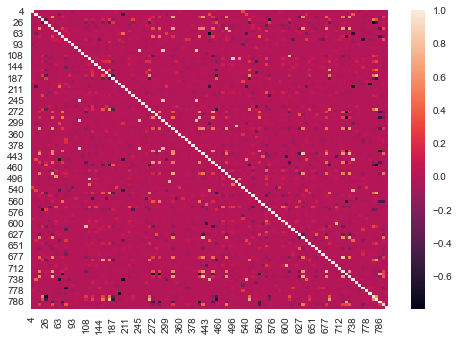

In [12]:
corr = df_coded.corr(method='spearman')
sns.heatmap(corr)


In [ ]:
shd_different_n_nearest = []
time_n_nearest = []
range_of_n_nearest = np.arange(3, 10)
brave = pd.DataFrame(data=np.zeros(
    (len(df.columns), len(df.columns))), columns=df.columns)
brave.index = df.columns

for i in tqdm(range_of_n_nearest):
    start_time = time.time()
    groups = get_n_nearest(corr, df.columns.tolist(),
                           corr=True, number_close=i)
    for c1 in df.columns:
        for c2 in df.columns:
            a = 0
            b = 0
            c = 0
            d = 0
            if c1 != c2:
                for g in groups:
                    if (c1 in g) & (c2 in g):
                        a += 1
                    if (c1 in g) & (c2 not in g):
                        b += 1
                    if (c1 not in g) & (c2 in g):
                        c += 1
                    if (c1 not in g) & (c2 not in g):
                        d += 1
                br = (a*len(groups) + (a+c)*(a+b)) / ((math.sqrt((a + c + 0.00000001) *
                                                                 (b+d + 0.00000001))) * (math.sqrt((a+b + 0.00000001)*(c+d + 0.00000001))))
                brave.loc[c1, c2] = br
    possible_edges = []
    for c1 in df.columns:
        for c2 in df.columns:
            if brave.loc[c1, c2] > brave.max(numeric_only='true').max()*0.5:
                possible_edges.append((c1, c2))
    bn = structure_learning(df_coded, 'HC', get_nodes_type(
        df_coded), 'K2', white_list=possible_edges)
    brave_edgse = []
    for e in bn['E']:
        brave_edgse.append((e[0], e[1]))
    shd_different_n_nearest.append(
        precision_recall(brave_edgse, structure_right)['SHD'])
    time_n_nearest.append(time.time() - start_time)
shd_different_n_nearest

fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.set_xlabel('Количество ближайших соседей (корреляция)')
ax1.set_ylabel('Метрика SHD', color=color)
ax1.plot(range_of_n_nearest, shd_different_n_nearest, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('Время, с', color=color)
ax2.plot(range_of_n_nearest, time_n_nearest, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.show()

shd_results_n_relative = (
    1 - np.asarray(shd_different_n_nearest)/pr_sparsebn['SHD']) * 100
fig, ax1 = plt.subplots()
color = 'tab:green'
ax1.set_xlabel('Different nearest neighbors')
ax1.set_ylabel('SHD relatively sparsebn, %', color=color)
ax1.plot(range_of_n_nearest, shd_results_n_relative, color=color)
ax1.plot(range_of_n_nearest, 0 * shd_results_n_relative,
         color='tab:red', label='Sparsebn')
ax1.plot(range_of_n_nearest, shd_results_n_relative - shd_results_n_relative +
         (1 - pr_bidag['SHD']/pr_sparsebn['SHD']) * 100, color='tab:orange', label='BiDAG')
ax1.legend()
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('Time, s', color=color)
ax2.plot(range_of_n_nearest, time_n_nearest, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.show()

print(shd_different_n_nearest)
print(time_n_nearest)


In [ ]:
print(shd_different_n_nearest)
print(time_n_nearest)


[99, 105, 91, 93, 85, 90, 97]
[2.125, 2.096160650253296, 1.7211089134216309, 1.8331878185272217, 1.569061517715454, 1.854055643081665, 2.2022008895874023]


<AxesSubplot:>

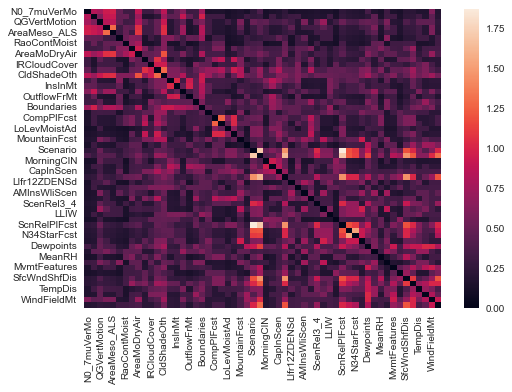

In [ ]:
sns.heatmap(brave)


100%|██████████| 16/16 [00:09<00:00,  1.74it/s]


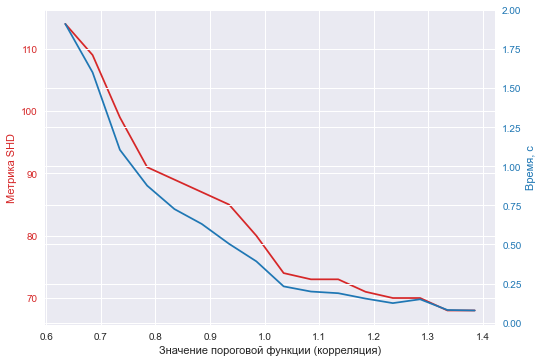

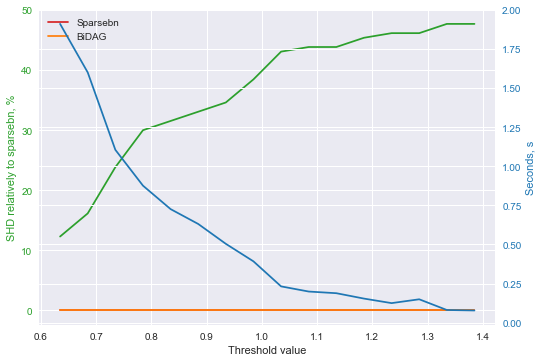

In [ ]:
shd_results = []
range_of_experiment = []
time_not_norm = []

brave = pd.DataFrame(data=np.zeros(
    (len(df.columns), len(df.columns))), columns=df.columns)
brave.index = df.columns
groups = get_n_nearest(corr, df.columns.tolist(), corr=True, number_close=5)
for c1 in df.columns:
    for c2 in df.columns:
        a = 0
        b = 0
        c = 0
        d = 0
        if c1 != c2:
            for g in groups:
                if (c1 in g) & (c2 in g):
                    a += 1
                if (c1 in g) & (c2 not in g):
                    b += 1
                if (c1 not in g) & (c2 in g):
                    c += 1
                if (c1 not in g) & (c2 not in g):
                    d += 1
            br = (a*len(groups) + (a+c)*(a+b)) / ((math.sqrt((a + c + 0.00000001) *
                                                             (b+d + 0.00000001))) * (math.sqrt((a+b + 0.00000001)*(c+d + 0.00000001))))
            brave.loc[c1, c2] = br

range_of_experiment = np.arange(brave.max(numeric_only='true').max(
)*0.4, brave.max(numeric_only='true').max()*0.9, 0.05)
for n in tqdm(range_of_experiment):
    possible_edges = []
    for c1 in df.columns:
        for c2 in df.columns:
            if brave.loc[c1, c2] > n:
                possible_edges.append((c1, c2))
    start_time = time.time()
    bn = structure_learning(df_coded, 'HC', get_nodes_type(
        df_coded), 'K2', white_list=possible_edges)
    time_not_norm.append(time.time() - start_time)
    brave_edgse = []
    for e in bn['E']:
        brave_edgse.append((e[0], e[1]))
    shd_results.append(precision_recall(brave_edgse, structure_right)['SHD'])
shd_results

fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.set_xlabel('Значение пороговой функции (корреляция)')
ax1.set_ylabel('Метрика SHD', color=color)
ax1.plot(range_of_experiment, shd_results, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('Время, с', color=color)
ax2.plot(range_of_experiment, time_not_norm, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.show()

shd_results_relative_sparsebn = (
    1 - np.asarray(shd_results)/pr_sparsebn['SHD']) * 100
fig, ax1 = plt.subplots()
color = 'tab:green'
ax1.set_xlabel('Threshold value')
ax1.set_ylabel('SHD relatively to sparsebn, %', color=color)
ax1.plot(range_of_experiment, shd_results_relative_sparsebn, color=color)
ax1.plot(range_of_experiment, shd_results_relative_sparsebn *
         0, color='tab:red', label='Sparsebn')
ax1.plot(range_of_experiment, shd_results_relative_sparsebn - shd_results_relative_sparsebn +
         (1 - pr_bidag['SHD']/pr_sparsebn['SHD']) * 100, color='tab:orange', label='BiDAG')
ax1.legend()
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('Seconds, s', color=color)
ax2.plot(range_of_experiment, time_not_norm, color=color)
ax2.tick_params(axis='y', labelcolor=color)

ax3 = ax1

fig.tight_layout()
plt.show()
